In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

In [45]:
sig = gpd.read_file('./data/sig_20230729/sig.shp', encoding = 'utf-8')
seoul = sig[sig['SIG_CD'].str.startswith('11')]

In [50]:
seoul

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry
0,11110,Jongno-gu,b'c1beb7ceb1b8',"POLYGON ((956615.453 1953567.199, 956621.579 1..."
1,11140,Jung-gu,b'c1dfb1b8',"POLYGON ((957890.386 1952616.746, 957909.908 1..."
2,11170,Yongsan-gu,b'bfebbbeab1b8',"POLYGON ((953115.761 1950834.084, 953114.206 1..."
3,11200,Seongdong-gu,b'bcbab5bfb1b8',"POLYGON ((959681.109 1952649.605, 959842.412 1..."
4,11215,Gwangjin-gu,b'b1a4c1f8b1b8',"POLYGON ((964825.058 1952633.250, 964875.565 1..."
5,11230,Dongdaemun-gu,b'b5bfb4ebb9aeb1b8',"POLYGON ((962141.919 1956519.461, 962149.853 1..."
6,11260,Jungnang-gu,b'c1dfb6fbb1b8',"POLYGON ((965698.531 1957987.355, 965772.290 1..."
7,11290,Seongbuk-gu,b'bcbabacfb1b8',"POLYGON ((956787.318 1953542.506, 956761.258 1..."
8,11305,Gangbuk-gu,b'b0adbacfb1b8',"POLYGON ((956316.789 1965175.345, 956401.551 1..."
9,11320,Dobong-gu,b'b5b5bac0b1b8',"POLYGON ((957223.835 1961199.545, 957195.758 1..."


In [29]:
reversed_seoul = seoul.T
seoul_codes = reversed_seoul.loc['SIG_CD']
seoul_codes = pd.concat([pd.Series(['코드']), seoul_codes])
seoul_codes

In [5]:
df = pd.read_csv('./data/AR6_SSP126_5ENSMN_skorea_TA_sgg261_monthly_2021_2100.txt', delimiter=',')
df

,코드,1101000000,1102000000,1103000000,1104000000,1105000000,1106000000,1107000000,1108000000,1109000000,...,3833000000,3834000000,3835000000,3836000000,3837000000,3838000000,3839000000,3840000000,3901000000,3902000000
0,광역,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,...,경상남도,경상남도,경상남도,경상남도,경상남도,경상남도,경상남도,경상남도,제주특별자치도,제주특별자치도
1,기초,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,창녕군,고성군,남해군,하동군,산청군,함양군,거창군,합천군,제주시,서귀포시
2,2021-01,-2.9,-2.5,-2.6,-2.1,-2.1,-2.3,-2.8,-2.8,-2.9,...,-0.7,0.7,1.9,0.5,-0.4,-1.6,-2.3,-1.1,4.9,5.6
3,2021-02,1.8,2.3,2.2,2.7,2.7,2.5,2.1,2.0,1.9,...,3.2,4.1,4.8,3.9,3.1,2.0,1.4,2.7,6.5,7.5
4,2021-03,9.4,9.9,9.8,10.3,10.3,10.2,9.8,9.7,9.6,...,10.2,10.1,10.6,10.3,9.9,9.0,8.5,9.7,11.4,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2100-08,29.2,29.7,29.6,29.9,29.9,29.8,29.4,29.4,29.4,...,28.6,28.3,28.6,28.3,27.7,27.1,26.6,27.9,29.4,29.4
958,2100-09,25.4,25.9,25.8,26.1,26.0,25.9,25.4,25.5,25.4,...,25.0,25.1,25.9,25.3,24.2,23.4,22.9,24.3,26.2,26.8
959,2100-10,16.8,17.3,17.3,17.5,17.5,17.3,16.6,16.9,16.7,...,17.1,17.9,18.9,17.7,16.3,15.3,14.7,16.2,20.5,21.1
960,2100-11,9.2,9.7,9.7,9.9,9.9,9.7,9.1,9.3,9.1,...,8.8,10.3,11.8,10.2,8.9,7.9,7.4,8.5,13.8,14.5


In [6]:
df_condition = df.columns.str.startswith('11') | df.columns.str.startswith('코드')
df_result = df.loc[:, df_condition]
df_result

,코드,1101000000,1102000000,1103000000,1104000000,1105000000,1106000000,1107000000,1108000000,1109000000,...,1116000000,1117000000,1118000000,1119000000,1120000000,1121000000,1122000000,1123000000,1124000000,1125000000
0,광역,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,...,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시
1,기초,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2,2021-01,-2.9,-2.5,-2.6,-2.1,-2.1,-2.3,-2.8,-2.8,-2.9,...,-2.5,-2.5,-2.1,-2.1,-2.4,-2.3,-2.2,-2.0,-2.0,-2.6
3,2021-02,1.8,2.3,2.2,2.7,2.7,2.5,2.1,2.0,1.9,...,2.2,2.2,2.5,2.6,2.3,2.4,2.5,2.7,2.8,2.2
4,2021-03,9.4,9.9,9.8,10.3,10.3,10.2,9.8,9.7,9.6,...,9.8,9.7,9.8,10.1,9.9,9.9,10.1,10.3,10.4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2100-08,29.2,29.7,29.6,29.9,29.9,29.8,29.4,29.4,29.4,...,29.8,29.8,29.7,30.2,29.8,29.6,30.0,30.0,29.9,29.6
958,2100-09,25.4,25.9,25.8,26.1,26.0,25.9,25.4,25.5,25.4,...,25.9,25.9,26.0,26.4,26.0,25.8,26.1,26.2,26.1,25.7
959,2100-10,16.8,17.3,17.3,17.5,17.5,17.3,16.6,16.9,16.7,...,17.4,17.4,17.7,18.0,17.6,17.5,17.5,17.7,17.5,17.0
960,2100-11,9.2,9.7,9.7,9.9,9.9,9.7,9.1,9.3,9.1,...,9.8,9.8,10.1,10.2,9.8,9.9,9.8,10.0,9.9,9.4


In [36]:
df_result.columns = seoul_codes

In [37]:
df_result

,코드,11110,11140,11170,11200,11215,11230,11260,11290,11305,...,11500,11530,11545,11560,11590,11620,11650,11680,11710,11740
0,광역,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,...,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시,서울특별시
1,기초,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
2,2021-01,-2.9,-2.5,-2.6,-2.1,-2.1,-2.3,-2.8,-2.8,-2.9,...,-2.5,-2.5,-2.1,-2.1,-2.4,-2.3,-2.2,-2.0,-2.0,-2.6
3,2021-02,1.8,2.3,2.2,2.7,2.7,2.5,2.1,2.0,1.9,...,2.2,2.2,2.5,2.6,2.3,2.4,2.5,2.7,2.8,2.2
4,2021-03,9.4,9.9,9.8,10.3,10.3,10.2,9.8,9.7,9.6,...,9.8,9.7,9.8,10.1,9.9,9.9,10.1,10.3,10.4,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,2100-08,29.2,29.7,29.6,29.9,29.9,29.8,29.4,29.4,29.4,...,29.8,29.8,29.7,30.2,29.8,29.6,30.0,30.0,29.9,29.6
958,2100-09,25.4,25.9,25.8,26.1,26.0,25.9,25.4,25.5,25.4,...,25.9,25.9,26.0,26.4,26.0,25.8,26.1,26.2,26.1,25.7
959,2100-10,16.8,17.3,17.3,17.5,17.5,17.3,16.6,16.9,16.7,...,17.4,17.4,17.7,18.0,17.6,17.5,17.5,17.7,17.5,17.0
960,2100-11,9.2,9.7,9.7,9.9,9.9,9.7,9.1,9.3,9.1,...,9.8,9.8,10.1,10.2,9.8,9.9,9.8,10.0,9.9,9.4


In [38]:
df_transpor = df_result.T
df_transpor.columns = df_transpor.iloc[0]
df_transpor = df_transpor[1:]

코드,광역,기초,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,...,2100-03,2100-04,2100-05,2100-06,2100-07,2100-08,2100-09,2100-10,2100-11,2100-12
11110,서울특별시,종로구,-2.9,1.8,9.4,15.6,20.3,24.8,26.7,28.2,...,8.7,13.5,20.5,24.0,26.7,29.2,25.4,16.8,9.2,1.2
11140,서울특별시,중구,-2.5,2.3,9.9,16.1,20.8,25.3,27.3,28.7,...,9.2,14.0,20.9,24.5,27.3,29.7,25.9,17.3,9.7,1.7
11170,서울특별시,용산구,-2.6,2.2,9.8,16.0,20.6,25.1,27.1,28.6,...,9.1,13.9,20.8,24.3,27.1,29.6,25.8,17.3,9.7,1.7
11200,서울특별시,성동구,-2.1,2.7,10.3,16.4,21.1,25.6,27.5,28.9,...,9.6,14.3,21.2,24.7,27.5,29.9,26.1,17.5,9.9,2.1
11215,서울특별시,광진구,-2.1,2.7,10.3,16.5,21.2,25.7,27.7,28.9,...,9.6,14.4,21.4,24.8,27.6,29.9,26.0,17.5,9.9,2.0


In [52]:
df_transpor.head()

코드,광역,기초,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,...,2100-03,2100-04,2100-05,2100-06,2100-07,2100-08,2100-09,2100-10,2100-11,2100-12
11110,서울특별시,종로구,-2.9,1.8,9.4,15.6,20.3,24.8,26.7,28.2,...,8.7,13.5,20.5,24.0,26.7,29.2,25.4,16.8,9.2,1.2
11140,서울특별시,중구,-2.5,2.3,9.9,16.1,20.8,25.3,27.3,28.7,...,9.2,14.0,20.9,24.5,27.3,29.7,25.9,17.3,9.7,1.7
11170,서울특별시,용산구,-2.6,2.2,9.8,16.0,20.6,25.1,27.1,28.6,...,9.1,13.9,20.8,24.3,27.1,29.6,25.8,17.3,9.7,1.7
11200,서울특별시,성동구,-2.1,2.7,10.3,16.4,21.1,25.6,27.5,28.9,...,9.6,14.3,21.2,24.7,27.5,29.9,26.1,17.5,9.9,2.1
11215,서울특별시,광진구,-2.1,2.7,10.3,16.5,21.2,25.7,27.7,28.9,...,9.6,14.4,21.4,24.8,27.6,29.9,26.0,17.5,9.9,2.0


In [56]:
seoul['SIG_CD']

0     11110
1     11140
2     11170
3     11200
4     11215
5     11230
6     11260
7     11290
8     11305
9     11320
10    11350
11    11380
12    11410
13    11440
14    11470
15    11500
16    11530
17    11545
18    11560
19    11590
20    11620
21    11650
22    11680
23    11710
24    11740
Name: SIG_CD, dtype: object

In [58]:
df_transpor.index

Index(['11110', '11140', '11170', '11200', '11215', '11230', '11260', '11290',
       '11305', '11320', '11350', '11380', '11410', '11440', '11470', '11500',
       '11530', '11545', '11560', '11590', '11620', '11650', '11680', '11710',
       '11740'],
      dtype='object')

In [59]:
# gdf = gpd.GeoDataFrame(pd.merge(seoul, df_transpor, left_on='SIG_KOR_NM', right_on='기초', how='left'))
gdf = gpd.GeoDataFrame(pd.merge(seoul, df_transpor, left_on='SIG_CD', right_index=True, how='left'))
gdf.head()

,SIG_CD,SIG_ENG_NM,SIG_KOR_NM,geometry,광역,기초,2021-01,2021-02,2021-03,2021-04,...,2100-03,2100-04,2100-05,2100-06,2100-07,2100-08,2100-09,2100-10,2100-11,2100-12
0,11110,Jongno-gu,b'c1beb7ceb1b8',"POLYGON ((956615.453 1953567.199, 956621.579 1...",서울특별시,종로구,-2.9,1.8,9.4,15.6,...,8.7,13.5,20.5,24.0,26.7,29.2,25.4,16.8,9.2,1.2
1,11140,Jung-gu,b'c1dfb1b8',"POLYGON ((957890.386 1952616.746, 957909.908 1...",서울특별시,중구,-2.5,2.3,9.9,16.1,...,9.2,14.0,20.9,24.5,27.3,29.7,25.9,17.3,9.7,1.7
2,11170,Yongsan-gu,b'bfebbbeab1b8',"POLYGON ((953115.761 1950834.084, 953114.206 1...",서울특별시,용산구,-2.6,2.2,9.8,16.0,...,9.1,13.9,20.8,24.3,27.1,29.6,25.8,17.3,9.7,1.7
3,11200,Seongdong-gu,b'bcbab5bfb1b8',"POLYGON ((959681.109 1952649.605, 959842.412 1...",서울특별시,성동구,-2.1,2.7,10.3,16.4,...,9.6,14.3,21.2,24.7,27.5,29.9,26.1,17.5,9.9,2.1
4,11215,Gwangjin-gu,b'b1a4c1f8b1b8',"POLYGON ((964825.058 1952633.250, 964875.565 1...",서울특별시,광진구,-2.1,2.7,10.3,16.5,...,9.6,14.4,21.4,24.8,27.6,29.9,26.0,17.5,9.9,2.0


In [60]:
gdf = gpd.GeoDataFrame(gdf, geometry='geometry')

In [61]:
import matplotlib.pyplot as plt

import warnings

<Axes: >

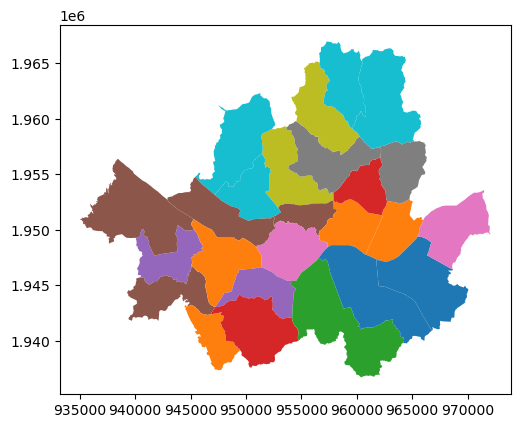

In [62]:
gdf.plot("2021-01")

<Axes: >

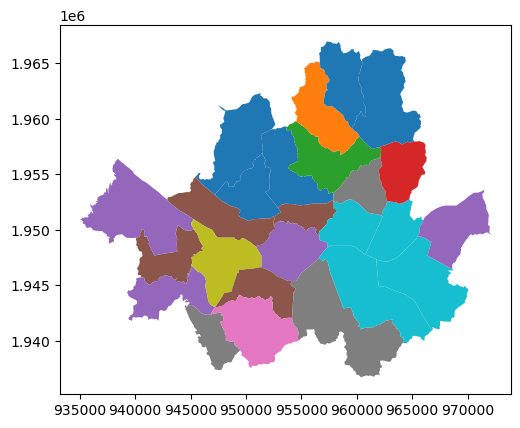

In [63]:
gdf.plot("2021-02")

In [64]:
variable = "2021-02"
vmin, vmax = -20, 40

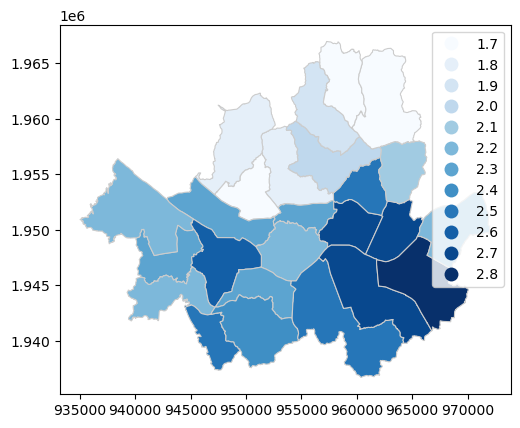

In [72]:
ax = gdf.plot(column=variable, cmap='Blues', linewidth=0.8, edgecolor='0.8', legend=True)

In [68]:
ax.set_title('Preventable death rate in London', fontdict={'fontsize': '25', 'fontweight' : '3'})

Text(0.5, 1.0, 'Preventable death rate in London')